In [1]:
import numpy as np


34.95326427578343

In [70]:
np.std([50,50])

0.0

In [71]:
np.std([100,0])

50.0

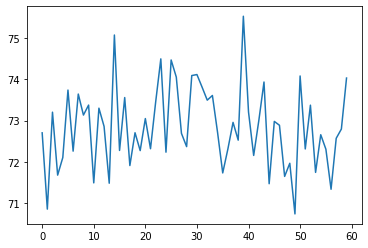

sigma =  1 标准差 =  0.99


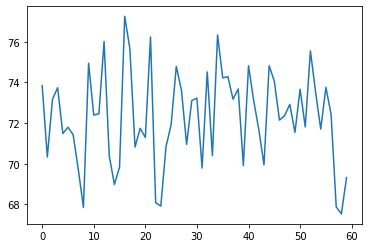

sigma =  2 标准差 =  2.32


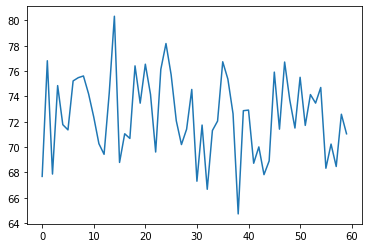

sigma =  3 标准差 =  3.18


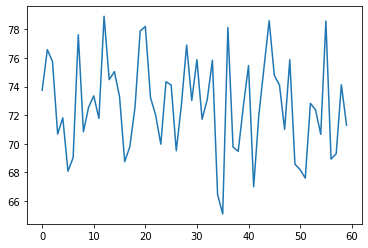

sigma =  4 标准差 =  3.33


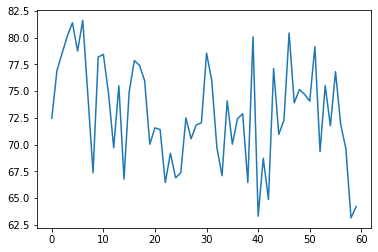

sigma =  5 标准差 =  4.73


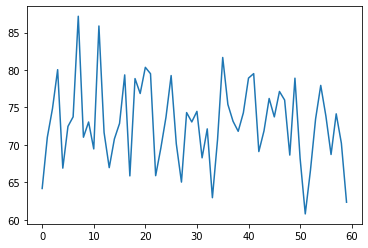

sigma =  6 标准差 =  5.46


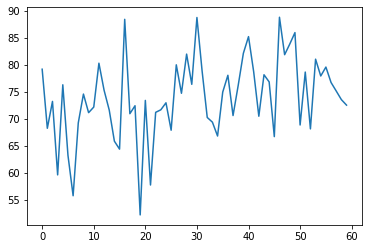

sigma =  7 标准差 =  7.59


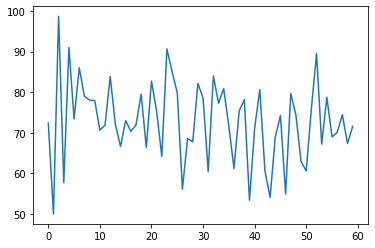

sigma =  8 标准差 =  9.94


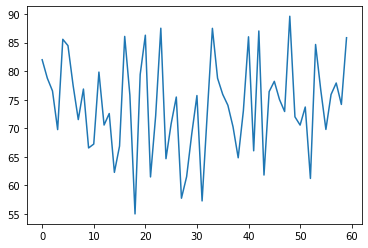

sigma =  9 标准差 =  8.34


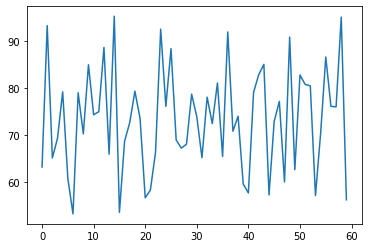

sigma =  10 标准差 =  11.08


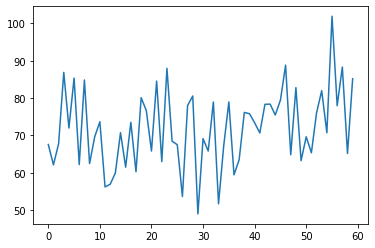

sigma =  11 标准差 =  10.4


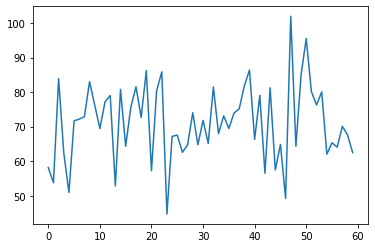

sigma =  12 标准差 =  11.16


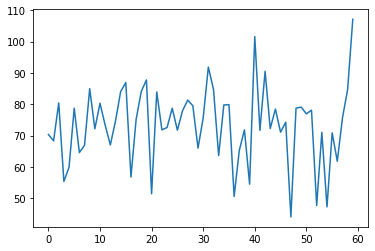

sigma =  13 标准差 =  12.34


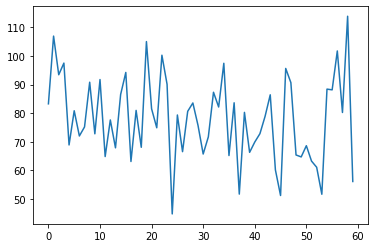

sigma =  14 标准差 =  14.82


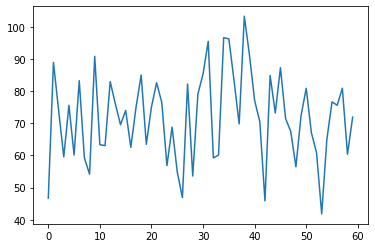

sigma =  15 标准差 =  13.63


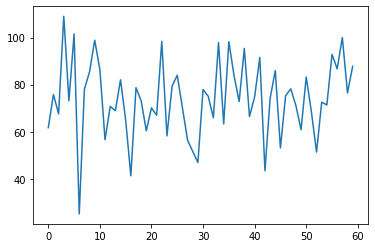

sigma =  16 标准差 =  16.28


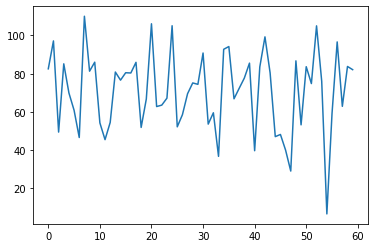

sigma =  17 标准差 =  20.64


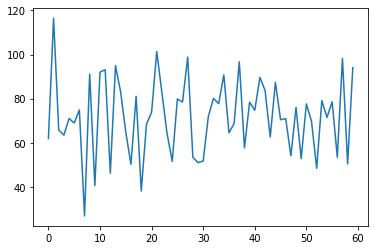

sigma =  18 标准差 =  17.58


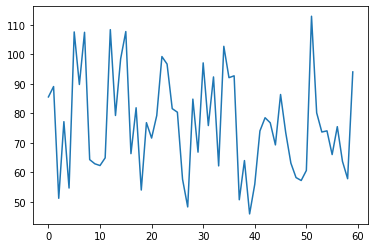

sigma =  19 标准差 =  17.02


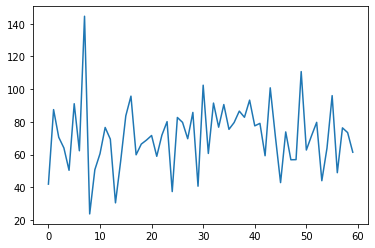

sigma =  20 标准差 =  20.31


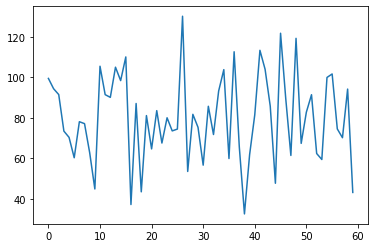

sigma =  21 标准差 =  21.7


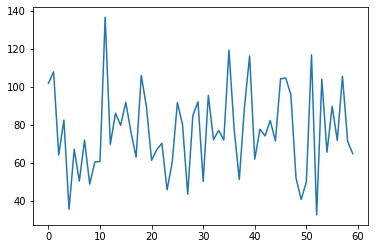

sigma =  22 标准差 =  22.25


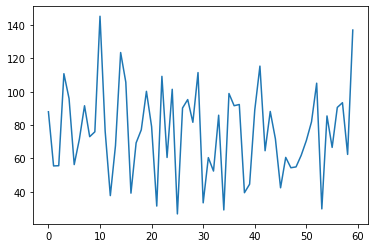

sigma =  23 标准差 =  26.92


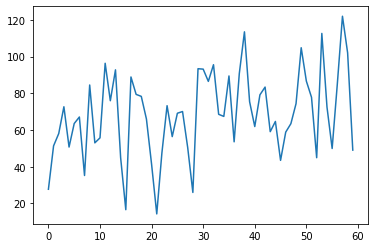

sigma =  24 标准差 =  23.05


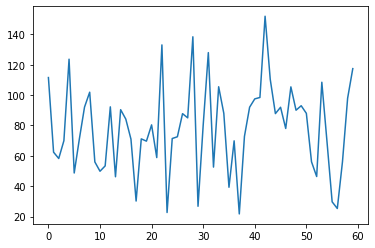

sigma =  25 标准差 =  29.49


In [75]:
times = 60
for scale in range(1,26):
    res = []
    for i in range(times):
        res.append(np.random.normal(loc=73, scale=scale))
    plt.plot(res)
    plt.show()
    print('sigma = ', scale,'标准差 = ',round(np.std(res),2))

In [73]:
import plotly.graph_objects as go
import datetime
from datetime import datetime
import random
import calendar
import time
import sklearn
from matplotlib.lines import Line2D
import statsmodels.tsa.stattools as ts
import matplotlib.ticker as mtick
import matplotlib.collections as collections
from numpy import linalg
import os
import sys
import pandas as pd 
import numpy as np
import warnings
from sklearn import datasets
warnings.filterwarnings("ignore")
import math
import operator
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.font_manager as fm
from sklearn import preprocessing
from sklearn import linear_model
from statsmodels.tsa.arima_model import ARIMA
from sklearn.decomposition import PCA
from scipy.stats import pearsonr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy import stats
from copy import deepcopy
from datetime import datetime
from WindPy import w
w.start()
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_extraction import DictVectorizer
import csv
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


In [11]:
int_list = [['M0020188','股票'],['S0105896','商品'],['M1004271','10债'],['M1004263','1债']]

#起止时间
t0 = '2004-06-01'
t1 = '2020-10-01'

#指数取值周期
dic = {'D':'天', 'W':'周', 'M':'月', 'Q':'季度', 'S':'半年', 'Y':'年'}
prd = 'M'

#移动平均线平均时长
l = 12

ind_list = []
for i in int_list:
    ind_list.append(i[0])

og = w.wsd(ind_list, 'close', t0, '-1D', Period = prd, Fill = 'Previous')

#训练比例
r = .5

#指数与日期
data = og.Data
date = og.Times


# 数据处理

In [3]:
df = []
d8 = []

#从第l个周期开始
for i in range(l-1,len(date)):
    temp = []
    
    for j in range(len(data)):

        #日期转化为天数
        if j == 0:
            d8.append(int((date[i] - date[0]).days))
        
        #选取第j组第i+l时间点前l长度的数据
        il = data[j][i-l+1:i+1]
        
        #第i+l时间点的数据————0
        temp.append(il[-1])
        
        #第i+l时间点前l长度的移动平均值————1
        temp.append(sum(il)/l)
        
        #第i+l时间点前l长度的涨跌幅度及方向————2,3
        temp.append(il[-1]/il[0]-1)
        temp.append(-(-1) ** (il[-1]/il[0]>1))
        
        #第i+l时间点前l长度内的波动幅度————4
        temp.append(((max(il)-min(il))/(sum(il)/l)))
        
        #第i+l时间点前l长度内的波动频率————5
        spike = 0
        dirc = -(-1) ** (il[1] > il[0]) 
        for k in range(1,l):
            spike += (-(-1) ** (il[k] > il[k-1]) != dirc)
            dirc = -(-1) ** (il[k] > il[k-1])
        temp.append(spike)
                    
    df.append(temp)

# Fisher LDA

In [4]:
a = [i[3] for i in df]
b = [i[:3]+i[4:6] for i in df]
lda = LDA(n_components=2) #creating a LDA object
lda = lda.fit(b, a) #learning the projection matrix
X_lda = lda.transform(b) #using the model to project X 
lda_prd = lda.predict(b)

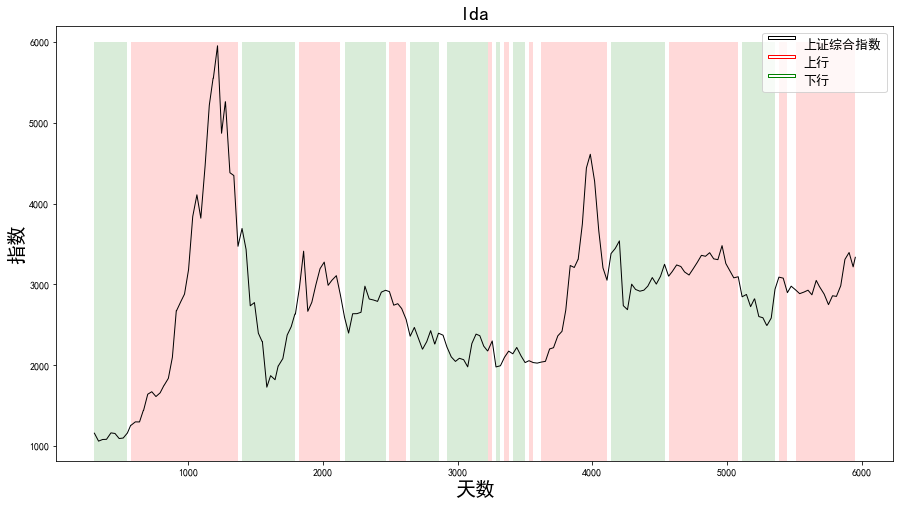

In [5]:
plt.rcParams['font.family']=['SimHei']
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('lda',fontproperties='SimHei', size = 20)
ax.plot(d8, [i[0] for i in df], color='black', linewidth = 1, label = '上证综合指数')

plt.xlabel(u'天数',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'指数',fontproperties='SimHei',fontsize = 20)

collection = collections.BrokenBarHCollection.span_where(
    d8, ymin=0, ymax=6000, where=np.array(lda_prd) == 1, facecolor='red', alpha=.15, label = '上行')
ax.add_collection(collection)

collection = collections.BrokenBarHCollection.span_where(
    d8, ymin=0, ymax=6000, where=np.array(lda_prd) == -1, facecolor='green', alpha=.15, label = '下行')
ax.add_collection(collection)


new_legends = ["-", "-", "-"]
markers = ['-', '-','-']
colors = ['black', 'red', 'green']

_, labels = ax.get_legend_handles_labels()

def dupe_legend(label, color):
    line = Line2D([0], [0], linestyle='none', mfc= 'white',
                mec=color, marker=r'$\mathregular{{{}}}$'.format(label))
    return line

duplicates = [dupe_legend(leg, color) for leg, color in zip(new_legends, colors)]
ax.legend(duplicates, labels, numpoints=1, markerscale=5, fontsize=13)

plt.show()

# Random Forest

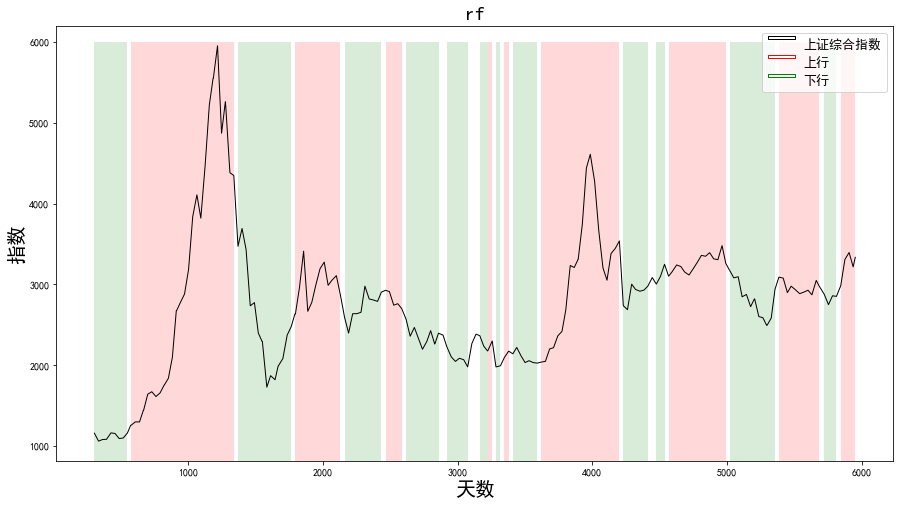

In [6]:
rf=RandomForestRegressor()
rf.fit(b, a)
rf_prd = rf.predict(b)

plt.rcParams['font.family']=['SimHei']
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('rf',fontproperties='SimHei', size = 20)
ax.plot(d8, [i[0] for i in df], color='black', linewidth = 1, label = '上证综合指数')

plt.xlabel(u'天数',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'指数',fontproperties='SimHei',fontsize = 20)

collection = collections.BrokenBarHCollection.span_where(
    d8, ymin=0, ymax=6000, where=np.array(rf_prd) == 1, facecolor='red', alpha=.15, label = '上行')
ax.add_collection(collection)

collection = collections.BrokenBarHCollection.span_where(
    d8, ymin=0, ymax=6000, where=np.array(rf_prd) == -1, facecolor='green', alpha=.15, label = '下行')
ax.add_collection(collection)


new_legends = ["-", "-", "-"]
markers = ['-', '-','-']
colors = ['black', 'red', 'green']

_, labels = ax.get_legend_handles_labels()

def dupe_legend(label, color):
    line = Line2D([0], [0], linestyle='none', mfc= 'white',
                mec=color, marker=r'$\mathregular{{{}}}$'.format(label))
    return line

duplicates = [dupe_legend(leg, color) for leg, color in zip(new_legends, colors)]
ax.legend(duplicates, labels, numpoints=1, markerscale=5, fontsize=13)

plt.show()

# Decision Tree

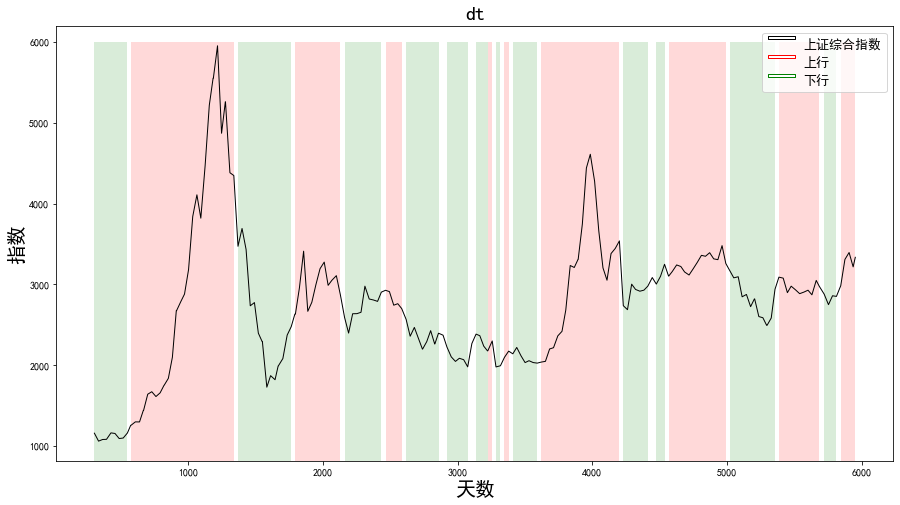

In [7]:
dt = DecisionTreeClassifier()
dt.fit(b, a)
dt_prd = dt.predict(b)

plt.rcParams['font.family']=['SimHei']
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('dt',fontproperties='SimHei', size = 20)
ax.plot(d8, [i[0] for i in df], color='black', linewidth = 1, label = '上证综合指数')

plt.xlabel(u'天数',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'指数',fontproperties='SimHei',fontsize = 20)

collection = collections.BrokenBarHCollection.span_where(
    d8, ymin=0, ymax=6000, where=np.array(dt_prd) == 1, facecolor='red', alpha=.15, label = '上行')
ax.add_collection(collection)

collection = collections.BrokenBarHCollection.span_where(
    d8, ymin=0, ymax=6000, where=np.array(dt_prd) == -1, facecolor='green', alpha=.15, label = '下行')
ax.add_collection(collection)


new_legends = ["-", "-", "-"]
markers = ['-', '-','-']
colors = ['black', 'red', 'green']

_, labels = ax.get_legend_handles_labels()

def dupe_legend(label, color):
    line = Line2D([0], [0], linestyle='none', mfc= 'white',
                mec=color, marker=r'$\mathregular{{{}}}$'.format(label))
    return line

duplicates = [dupe_legend(leg, color) for leg, color in zip(new_legends, colors)]
ax.legend(duplicates, labels, numpoints=1, markerscale=5, fontsize=13)

plt.show()

# SVM

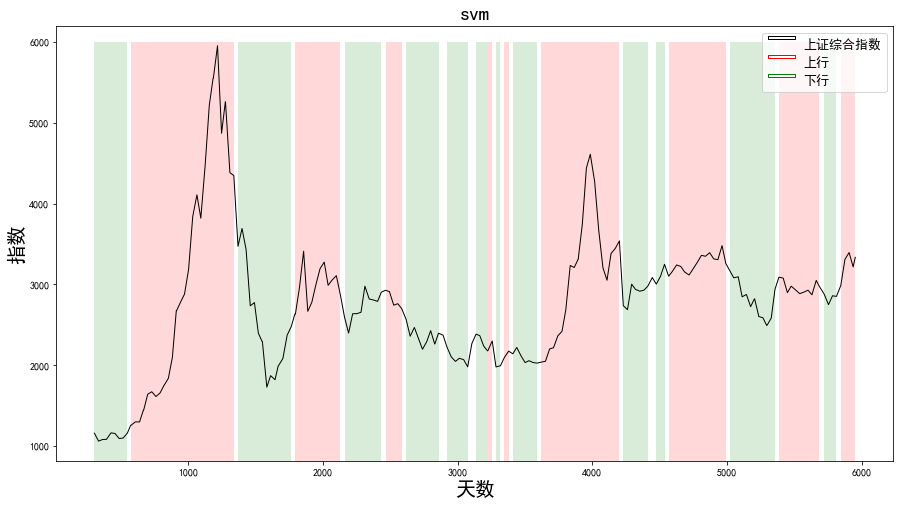

In [8]:
clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf.fit(b, a)
svm_prd = clf.predict(b)

plt.rcParams['font.family']=['SimHei']
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('svm',fontproperties='SimHei', size = 20)
ax.plot(d8, [i[0] for i in df], color='black', linewidth = 1, label = '上证综合指数')

plt.xlabel(u'天数',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'指数',fontproperties='SimHei',fontsize = 20)

collection = collections.BrokenBarHCollection.span_where(
    d8, ymin=0, ymax=6000, where=np.array(svm_prd) == 1, facecolor='red', alpha=.15, label = '上行')
ax.add_collection(collection)

collection = collections.BrokenBarHCollection.span_where(
    d8, ymin=0, ymax=6000, where=np.array(svm_prd) == -1, facecolor='green', alpha=.15, label = '下行')
ax.add_collection(collection)


new_legends = ["-", "-", "-"]
markers = ['-', '-','-']
colors = ['black', 'red', 'green']

_, labels = ax.get_legend_handles_labels()

def dupe_legend(label, color):
    line = Line2D([0], [0], linestyle='none', mfc= 'white',
                mec=color, marker=r'$\mathregular{{{}}}$'.format(label))
    return line

duplicates = [dupe_legend(leg, color) for leg, color in zip(new_legends, colors)]
ax.legend(duplicates, labels, numpoints=1, markerscale=5, fontsize=13)

plt.show()

# Max Min

In [12]:
dfp = deepcopy(data)
cd = 6
slow = 24
i = 0
ud = [0] * len(dfp[0])

while i < len(dfp[0]):
    
    if i == len(dfp[0]) - 1:
        ud[-1] = ud[-2]
        break
        
    cur = dfp[0][i]
    next_id = min([(dfp[0]).index(max(dfp[0][i+1:])), (dfp[0]).index(min(dfp[0][i+1:]))])
    
    if slow >= next_id - i >= cd:
        
        ud[i:next_id+1] = [- (-1) ** (dfp[0][next_id] > dfp[0][i])] * (next_id + 1 - i)
        i = next_id
    elif next_id > slow:
        
        next_id = max([(dfp[0]).index(max(dfp[0][i+1:i+slow+1])), (dfp[0]).index(min(dfp[0][i+1:i+slow+1]))])
        ud[i:next_id+1] = [- (-1) ** (dfp[0][next_id] > dfp[0][i])] * (next_id + 1 - i)
        i = next_id
    else:
        
        next_id = max([(dfp[0]).index(max(dfp[0][i+1:])), (dfp[0]).index(min(dfp[0][i+1:]))])
        ud[i:next_id+1] = [- (-1) ** (dfp[0][next_id] > dfp[0][i])] * (next_id + 1 - i)
        i = next_id

ValueError: x and y must have same first dimension, but have shapes (210,) and (220,)

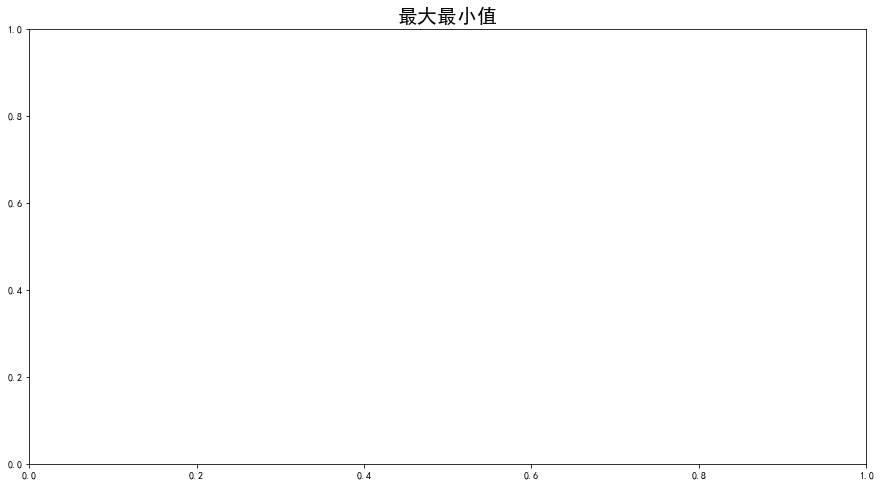

In [10]:
plt.rcParams['font.family']=['SimHei']
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('最大最小值',fontproperties='SimHei', size = 20)
ax.plot(d8, data[0][:-1], color='black', linewidth = 1, label = '上证综合指数')

plt.xlabel(u'天数',fontproperties='SimHei',fontsize = 20)
plt.ylabel(u'指数',fontproperties='SimHei',fontsize = 20)

collection = collections.BrokenBarHCollection.span_where(
    d8, ymin=0, ymax=6000, where=np.array(ud) == 1, facecolor='red', alpha=.15, label = '上行')
ax.add_collection(collection)

collection = collections.BrokenBarHCollection.span_where(
    d8, ymin=0, ymax=6000, where=np.array(ud) == -1, facecolor='green', alpha=.15, label = '下行')
ax.add_collection(collection)


new_legends = ["-", "-", "-"]
markers = ['-', '-','-']
colors = ['black', 'red', 'green']

_, labels = ax.get_legend_handles_labels()

def dupe_legend(label, color):
    line = Line2D([0], [0], linestyle='none', mfc= 'white',
                mec=color, marker=r'$\mathregular{{{}}}$'.format(label))
    return line

duplicates = [dupe_legend(leg, color) for leg, color in zip(new_legends, colors)]
ax.legend(duplicates, labels, numpoints=1, markerscale=5, fontsize=13)

plt.show()